Step 1: Load and Preprocess the Data

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000  # Consider only the top 10,000 words
maxlen = 150  # Cut off reviews after 150 words

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Cut off reviews after 150 words
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


Step 2: Define the Model with Embedding Layer

We'll define the model with an embedding layer before the Bidirectional layer.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

embedding_dim = 32

model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


Step 3: Train and Evaluate the Model

We'll train the model on 100 training samples and validate on 10,000 samples.

In [3]:
history = model.fit(train_data[:100], train_labels[:100],
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_data[:10000], test_labels[:10000]))


Epoch 1/10
4/4 [==============================] - 16s 4s/step - loss: 0.6947 - acc: 0.4500 - val_loss: 0.6942 - val_acc: 0.5027
Epoch 2/10
4/4 [==============================] - 11s 3s/step - loss: 0.6855 - acc: 0.5800 - val_loss: 0.6940 - val_acc: 0.5027
Epoch 3/10
4/4 [==============================] - 11s 4s/step - loss: 0.6828 - acc: 0.5800 - val_loss: 0.6947 - val_acc: 0.5027
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 0.6781 - acc: 0.5800 - val_loss: 0.6949 - val_acc: 0.5027
Epoch 5/10
4/4 [==============================] - 11s 3s/step - loss: 0.6732 - acc: 0.5800 - val_loss: 0.6997 - val_acc: 0.5027
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.6640 - acc: 0.5800 - val_loss: 0.6977 - val_acc: 0.5027
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 0.6581 - acc: 0.5800 - val_loss: 0.7032 - val_acc: 0.5027
Epoch 8/10
4/4 [==============================] - 11s 3s/step - loss: 0.6479 - acc: 0.5800 - val_loss: 0.69

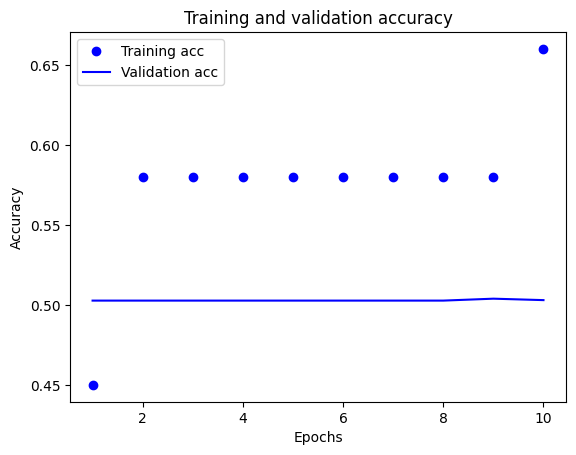

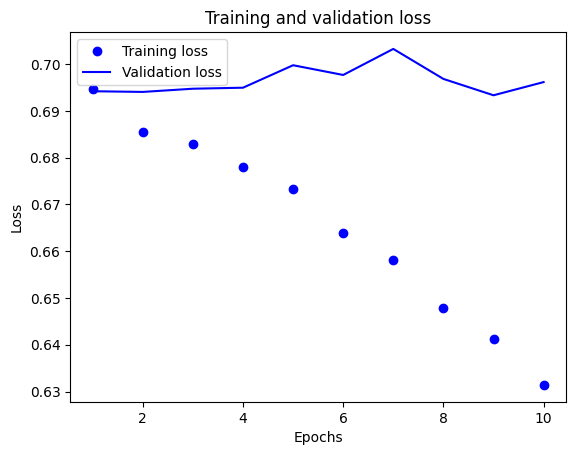

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Step 4: Repeat Steps 2-3 with Pre-trained Word Embedding

In [5]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from zipfile import ZipFile
import os

In [6]:
# Download the pre-trained word embedding
!wget https://nlp.stanford.edu/data/glove.6B.zip
# Unzip the downloaded file
with ZipFile('glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the IMDB dataset
max_features = 10000
maxlen = 150
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Cut off reviews after 150 words
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

# Load the pre-trained word embeddings
embedding_dim = 50  # Embedding dimension of the GloVe embeddings
embedding_index = {}
with open('glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create an embedding matrix
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, i in imdb.get_word_index().items():
    if i < max_features:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Define the model with pre-trained word embedding
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

# Set the pre-trained word embeddings in the Embedding layer
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train and evaluate the model
history = model.fit(train_data[:100], train_labels[:100],
                    epochs=10,
                    batch_size=32,
                    validation_data=(test_data[:10000], test_labels[:10000]))

--2024-04-23 13:32:17--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-04-23 13:32:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.01MB/s    in 2m 39s  

2024-04-23 13:34:56 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

1641221/1641221 [==============================] - 0s 0us/step
Epoch 1/10
4/4 [==============================

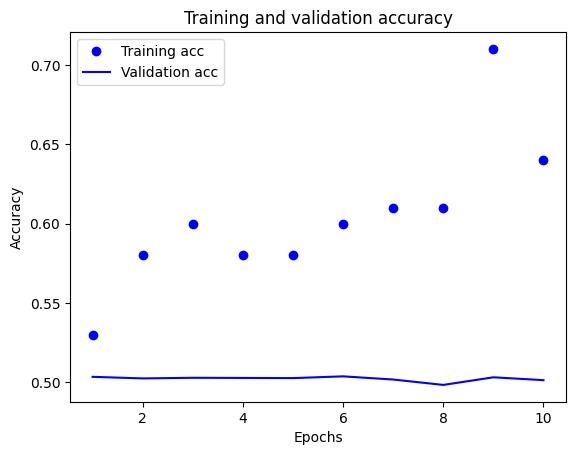

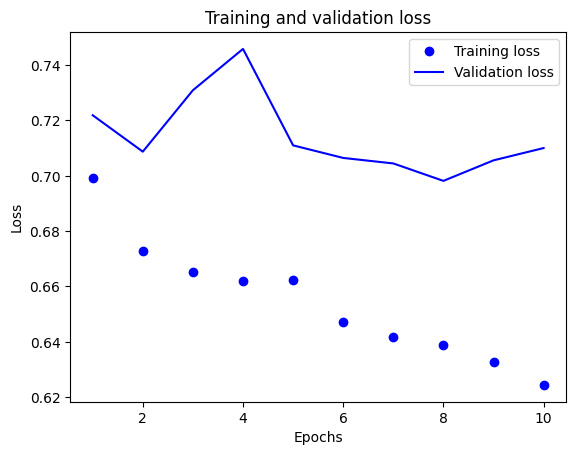

In [7]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
